In [1]:
%matplotlib inline
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Загружаем данные по колонне низкотемпературной ректификации

In [2]:
column_data = pd.read_csv('./data/low_temp_column_data.csv')
column_data.head()

,"4 temperature, C","4 pressure, kPa","4 mass flow, kg/h",4 molecular weight,"4 Mass density, kg/m3","4 actual liquid flow, m3/h","4 actual vapour flow, m3/h",4 mass heat capacity,4 Methane mass frac,4 Ethane mass frac,...,"17 actual liquid flow, m3/h","17 actual vapour flow, m3/h",17 mass heat capacity,17 Methane mass frac,17 Ethane mass frac,17 Propane mass frac,17 i-Butane mass frac,17 n-Butane mass frac,17 i-Pentane mass frac,17 n-Pentane mass frac
0,-18.0,2403.0,10944.0,20.207122,27.157227,2.620103,400.366549,2.293741,0.688085,0.073225,...,11.725398,0.000000,2.882375,0.009362,0.078007,0.058565,0.142900,0.587899,0.086530,0.036737
1,2.0,2336.0,9142.0,21.432697,24.978986,0.332588,365.655042,2.220181,0.578500,0.171611,...,27.499669,0.000000,2.865288,0.013587,0.033899,0.085088,0.496285,0.259732,0.035560,0.075850
2,-20.0,2606.0,12734.0,19.345031,28.208732,1.750523,449.669988,2.336821,0.737276,0.046599,...,7.554836,0.039635,2.991876,0.009196,0.038536,0.104208,0.341875,0.382467,0.069746,0.053972
3,-25.0,2138.0,21346.0,21.989820,28.831841,8.520768,731.841239,2.262518,0.567039,0.118404,...,47.851972,0.000000,2.997976,0.010771,0.019347,0.148859,0.347255,0.374755,0.033486,0.065528
4,-39.0,2230.0,24368.0,19.446331,27.058610,5.423416,895.140199,2.313913,0.706475,0.137369,...,44.154758,0.048472,3.005667,0.009846,0.029441,0.089005,0.362478,0.402147,0.053160,0.053923


In [3]:
column_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756500 entries, 0 to 756499
Data columns (total 61 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   4 temperature, C             756500 non-null  float64
 1   4 pressure, kPa              756500 non-null  float64
 2   4 mass flow, kg/h            756500 non-null  float64
 3   4 molecular weight           756500 non-null  float64
 4   4 Mass density, kg/m3        756500 non-null  float64
 5   4 actual liquid flow, m3/h   756500 non-null  float64
 6   4 actual vapour flow, m3/h   756500 non-null  float64
 7   4 mass heat capacity         756500 non-null  float64
 8   4 Methane mass frac          756500 non-null  float64
 9   4 Ethane mass frac           756500 non-null  float64
 10  4 Propane mass frac          756500 non-null  float64
 11  4 i-Butane mass frac         756500 non-null  float64
 12  4 n-Butane mass frac         756500 non-null  float64
 13 

In [4]:
column_data.describe()

,"4 temperature, C","4 pressure, kPa","4 mass flow, kg/h",4 molecular weight,"4 Mass density, kg/m3","4 actual liquid flow, m3/h","4 actual vapour flow, m3/h",4 mass heat capacity,4 Methane mass frac,4 Ethane mass frac,...,"17 actual liquid flow, m3/h","17 actual vapour flow, m3/h",17 mass heat capacity,17 Methane mass frac,17 Ethane mass frac,17 Propane mass frac,17 i-Butane mass frac,17 n-Butane mass frac,17 i-Pentane mass frac,17 n-Pentane mass frac
count,756500.000000,756500.000000,756500.000000,756500.000000,756500.000000,756500.000000,756500.000000,756500.000000,756500.000000,756500.000000,...,756500.000000,756500.000000,756500.000000,7.565000e+05,756500.000000,756500.000000,756500.000000,756500.000000,756500.000000,756500.000000
mean,-23.854432,2403.336691,13365.439516,20.515971,29.508518,3.576491,463.264952,2.310455,0.659098,0.089297,...,25.857595,0.201419,2.839123,1.312402e-02,0.069794,0.141413,0.355183,0.299056,0.053970,0.067459
std,15.536276,231.235044,6832.299114,0.947769,5.325942,3.114834,253.816152,0.058329,0.058440,0.039000,...,12.524942,5.675770,0.150689,6.026837e-03,0.038551,0.070282,0.137960,0.145306,0.029306,0.037808
min,-50.000000,2000.000000,1000.000000,17.567098,18.066921,0.000000,21.650133,2.151264,0.474671,0.016601,...,0.000000,0.000000,2.187889,3.802992e-07,0.000022,0.001050,0.020519,0.002586,0.001771,0.002120
25%,-37.000000,2204.000000,7571.000000,19.834738,25.577264,1.092338,253.439648,2.268274,0.618637,0.056642,...,15.464134,0.000000,2.748882,9.054959e-03,0.040431,0.089826,0.257365,0.188299,0.032852,0.040149
50%,-24.000000,2405.000000,13508.000000,20.459748,28.808099,2.739863,453.337146,2.305749,0.659794,0.089364,...,25.622504,0.000000,2.862135,1.130348e-02,0.065826,0.134593,0.363352,0.300972,0.050493,0.062910
75%,-11.000000,2604.000000,19265.000000,21.142385,32.759573,5.295035,652.414572,2.348184,0.699705,0.120279,...,35.902238,0.174391,2.945917,1.565798e-02,0.092197,0.182351,0.450826,0.401960,0.069718,0.087415
max,5.000000,2800.000000,25000.000000,23.929515,57.014294,21.966047,1318.075538,2.517617,0.868820,0.207423,...,63.332530,1275.888540,3.763393,2.051858e-01,0.431872,0.622995,0.858125,0.817103,0.385363,0.733842


## Температуры продуктовых потоков

In [5]:
list(column_data.columns)

['4 temperature, C',
 '4 pressure, kPa',
 '4 mass flow, kg/h',
 '4 molecular weight',
 '4 Mass density, kg/m3',
 '4 actual liquid flow, m3/h',
 '4 actual vapour flow, m3/h',
 '4 mass heat capacity',
 '4 Methane mass frac',
 '4 Ethane mass frac',
 '4 Propane mass frac',
 '4 i-Butane mass frac',
 '4 n-Butane mass frac',
 '4 i-Pentane mass frac',
 '4 n-Pentane mass frac',
 'Q-104',
 '5 temperature, C',
 '5 pressure, kPa',
 '5 mass flow, kg/h',
 '5 molecular weight',
 '5 Mass density, kg/m3',
 '5 actual liquid flow, m3/h',
 '5 actual vapour flow, m3/h',
 '5 mass heat capacity',
 '5 Methane mass frac',
 '5 Ethane mass frac',
 '5 Propane mass frac',
 '5 i-Butane mass frac',
 '5 n-Butane mass frac',
 '5 i-Pentane mass frac',
 '5 n-Pentane mass frac',
 '16 temperature, C',
 '16 pressure, kPa',
 '16 mass flow, kg/h',
 '16 molecular weight',
 '16 Mass density, kg/m3',
 '16 actual liquid flow, m3/h',
 '16 actual vapour flow, m3/h',
 '16 mass heat capacity',
 '16 Methane mass frac',
 '16 Ethane ma

In [6]:
## Корреляционная матрица
corr_matrix = column_data.corr()

corr_matrix['16 temperature, C'].sort_values(ascending=False)

16 temperature, C         1.000000
4 temperature, C          0.954432
16 molecular weight       0.897580
16 i-Butane mass frac     0.853996
16 i-Pentane mass frac    0.772819
                            ...   
4 mass heat capacity     -0.725298
16 Methane mass frac     -0.834739
16 mass heat capacity    -0.942869
16 pressure, kPa               NaN
17 pressure, kPa               NaN
Name: 16 temperature, C, Length: 61, dtype: float64

In [7]:
prod_stream_data = column_data[[
    '4 temperature, C', '4 pressure, kPa', '4 mass flow, kg/h',  '4 Methane mass frac', '4 Ethane mass frac',
    '4 Propane mass frac', '4 i-Butane mass frac', '4 n-Butane mass frac', '4 i-Pentane mass frac', '4 n-Pentane mass frac',
    'Q-104', 
    '5 temperature, C', '5 pressure, kPa', '5 mass flow, kg/h', '5 Methane mass frac', '5 Ethane mass frac',
    '5 Propane mass frac', '5 i-Butane mass frac', '5 n-Butane mass frac', '5 i-Pentane mass frac', '5 n-Pentane mass frac',
    '16 temperature, C', '17 temperature, C'
]]

In [8]:
## Корреляционная матрица
corr_matrix = prod_stream_data.corr()

corr_matrix['16 temperature, C'].sort_values(ascending=False)

16 temperature, C        1.000000
4 temperature, C         0.954432
17 temperature, C        0.180085
5 temperature, C         0.108255
4 i-Butane mass frac     0.060085
4 n-Pentane mass frac    0.054319
4 i-Pentane mass frac    0.040121
4 n-Butane mass frac     0.038657
4 Propane mass frac      0.025887
5 i-Butane mass frac     0.010962
4 mass flow, kg/h        0.010684
5 Ethane mass frac       0.006416
5 Propane mass frac      0.005271
5 n-Butane mass frac    -0.003882
5 i-Pentane mass frac   -0.007189
5 n-Pentane mass frac   -0.008814
5 pressure, kPa         -0.008864
5 mass flow, kg/h       -0.009834
4 Ethane mass frac      -0.019803
5 Methane mass frac     -0.020532
4 Methane mass frac     -0.055118
4 pressure, kPa         -0.079603
Q-104                   -0.156292
Name: 16 temperature, C, dtype: float64

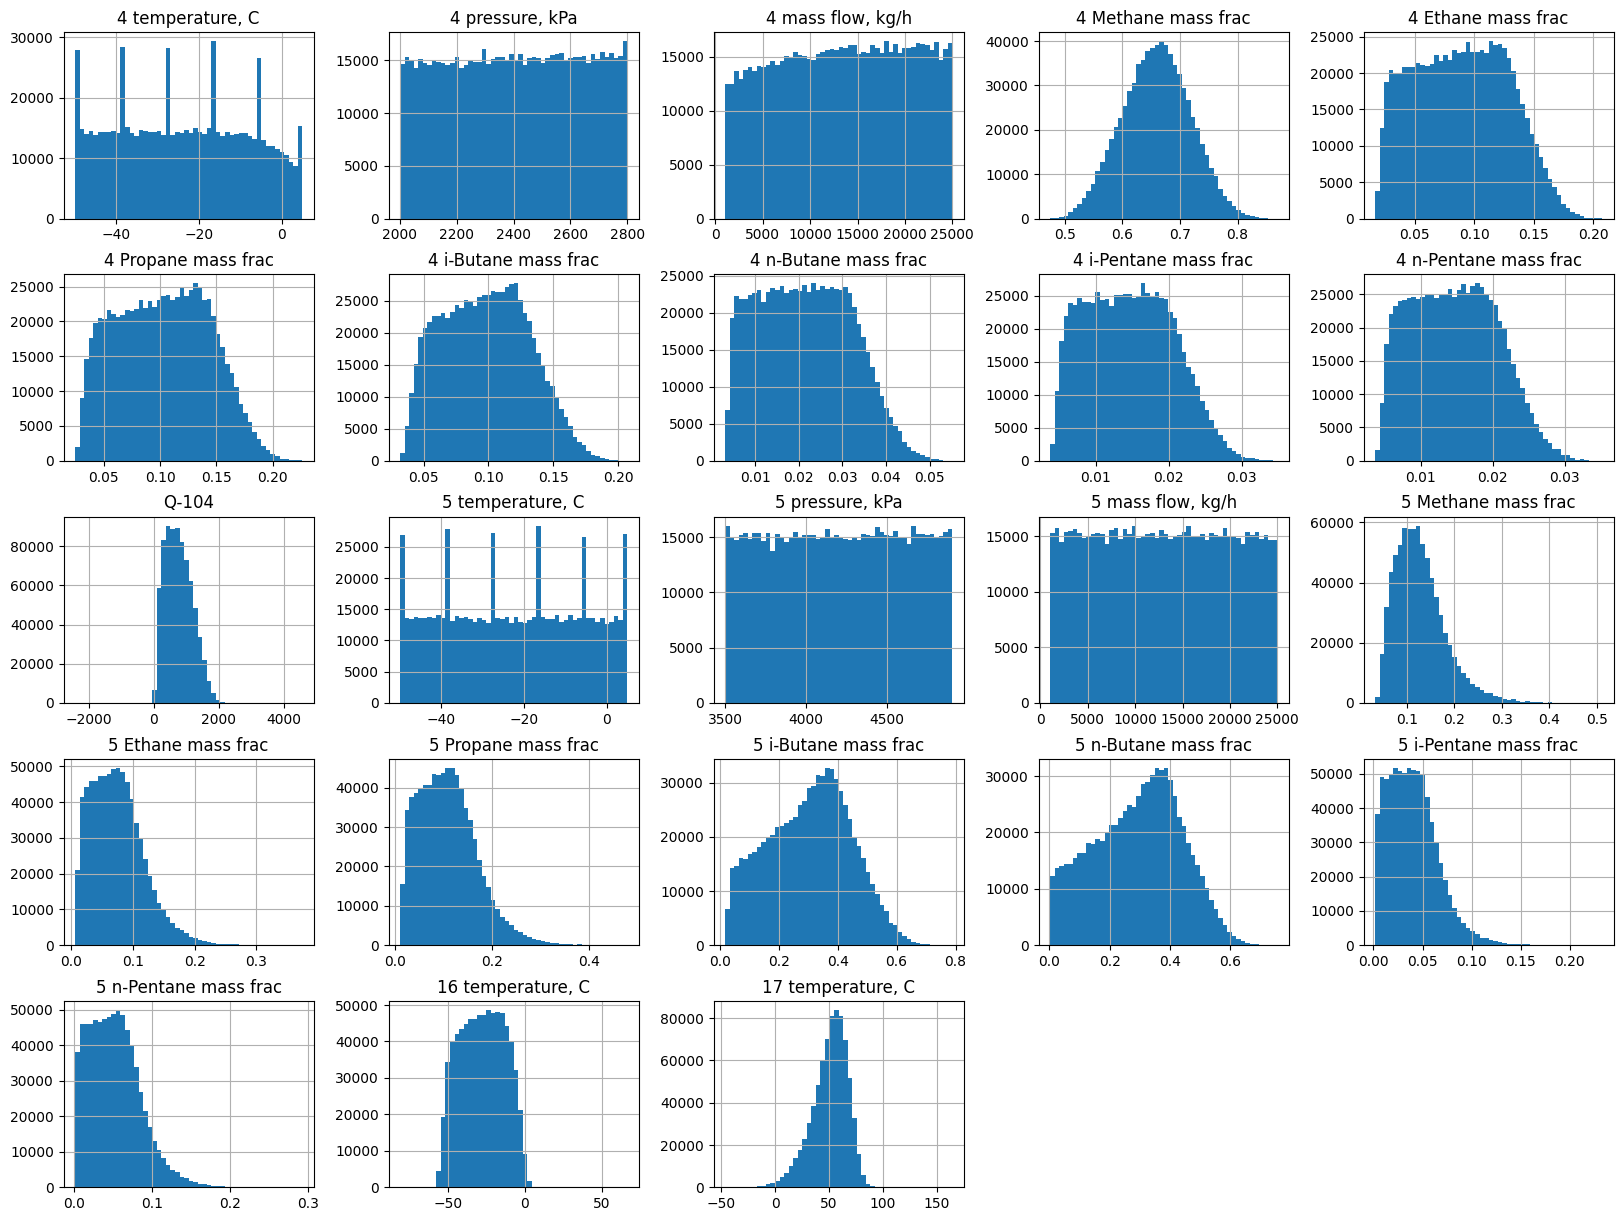

In [13]:
prod_stream_data.hist(bins=50, figsize=(20, 15));

In [9]:
## Тестовая и обучающая выборки
X = prod_stream_data[[
    '4 temperature, C', '4 pressure, kPa', '4 mass flow, kg/h',  '4 Methane mass frac', '4 Ethane mass frac',
    '4 Propane mass frac', '4 i-Butane mass frac', '4 n-Butane mass frac', '4 i-Pentane mass frac', '4 n-Pentane mass frac',
    'Q-104', 
    '5 temperature, C', '5 pressure, kPa', '5 mass flow, kg/h', '5 Methane mass frac', '5 Ethane mass frac',
    '5 Propane mass frac', '5 i-Butane mass frac', '5 n-Butane mass frac', '5 i-Pentane mass frac', '5 n-Pentane mass frac',
]]

y = prod_stream_data[['16 temperature, C', '17 temperature, C']]

# Собираем трансформер столбцов
ct = make_column_transformer(
    (MinMaxScaler(), ['4 temperature, C', '4 pressure, kPa', '4 mass flow, kg/h','4 Methane mass frac',
                      '4 Ethane mass frac', '4 Propane mass frac', '4 i-Butane mass frac', '4 n-Butane mass frac',
                      '4 i-Pentane mass frac', '4 n-Pentane mass frac', 'Q-104', '5 temperature, C', '5 pressure, kPa',
                      '5 mass flow, kg/h', '5 Methane mass frac', '5 Ethane mass frac', '5 Propane mass frac',
                      '5 i-Butane mass frac', '5 n-Butane mass frac', '5 i-Pentane mass frac', '5 n-Pentane mass frac',])
)

# Создаем обучающую и тестовые выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Загружаем тренировочную выборку
ct.fit(X_train)

# Нормализуем данные
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

X_train_normal.shape, y_train.shape

((605200, 21), (605200, 2))

In [14]:
X.descri

,"4 temperature, C","4 pressure, kPa","4 mass flow, kg/h",4 Methane mass frac,4 Ethane mass frac,4 Propane mass frac,4 i-Butane mass frac,4 n-Butane mass frac,4 i-Pentane mass frac,4 n-Pentane mass frac,...,"5 temperature, C","5 pressure, kPa","5 mass flow, kg/h",5 Methane mass frac,5 Ethane mass frac,5 Propane mass frac,5 i-Butane mass frac,5 n-Butane mass frac,5 i-Pentane mass frac,5 n-Pentane mass frac
count,756500.000000,756500.000000,756500.000000,756500.000000,756500.000000,756500.000000,756500.000000,756500.000000,756500.000000,756500.000000,...,756500.000000,756500.000000,756500.000000,756500.000000,756500.000000,756500.000000,756500.000000,756500.000000,756500.000000,756500.000000
mean,-23.854432,2403.336691,13365.439516,0.659098,0.089297,0.102738,0.097958,0.021537,0.014647,0.014725,...,-22.578785,4201.488827,12952.634089,0.127876,0.075000,0.108634,0.303250,0.292720,0.040031,0.052490
std,15.536276,231.235044,6832.299114,0.058440,0.039000,0.040603,0.033019,0.010412,0.005888,0.005884,...,16.156905,405.147423,6919.073354,0.053477,0.042639,0.059693,0.140350,0.144137,0.024943,0.032885
min,-50.000000,2000.000000,1000.000000,0.474671,0.016601,0.024350,0.031719,0.003071,0.003722,0.003633,...,-50.000000,3500.000000,1000.000000,0.032382,0.006340,0.009732,0.017781,0.002024,0.001525,0.001550
25%,-37.000000,2204.000000,7571.000000,0.618637,0.056642,0.068939,0.071000,0.012794,0.009733,0.009810,...,-37.000000,3851.000000,6977.000000,0.088819,0.041603,0.061873,0.194847,0.182165,0.020396,0.026393
50%,-24.000000,2405.000000,13508.000000,0.659794,0.089364,0.103079,0.097895,0.021295,0.014495,0.014598,...,-23.000000,4202.000000,12925.000000,0.120147,0.070771,0.103566,0.313189,0.305453,0.037527,0.049586
75%,-11.000000,2604.000000,19265.000000,0.699705,0.120279,0.134735,0.122728,0.029737,0.019137,0.019225,...,-9.000000,4552.000000,18933.000000,0.156264,0.100511,0.145161,0.406060,0.399827,0.055164,0.072725
max,5.000000,2800.000000,25000.000000,0.868820,0.207423,0.226293,0.207015,0.055214,0.034837,0.035211,...,5.000000,4900.000000,25000.000000,0.511559,0.374282,0.478235,0.788800,0.756774,0.232880,0.292297


In [17]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
prod_temp_model = tf.keras.Sequential([
    tf.keras.layers.Dense(21, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(2)
])

# 2. Compile the model
prod_temp_model.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
prod_temp_model.fit(X_train_normal, y_train, epochs=50)

Epoch 1/50
18913/18913 [==============================] - 46s 2ms/step - loss: 3.6983 - mae: 3.6983
Epoch 2/50
18913/18913 [==============================] - 44s 2ms/step - loss: 1.7778 - mae: 1.7778
Epoch 3/50
18913/18913 [==============================] - 45s 2ms/step - loss: 1.4187 - mae: 1.4187
Epoch 4/50
18913/18913 [==============================] - 44s 2ms/step - loss: 1.2707 - mae: 1.2707
Epoch 5/50
18913/18913 [==============================] - 45s 2ms/step - loss: 1.1655 - mae: 1.1655
Epoch 6/50
18913/18913 [==============================] - 44s 2ms/step - loss: 1.1168 - mae: 1.1168
Epoch 7/50
18913/18913 [==============================] - 45s 2ms/step - loss: 1.0595 - mae: 1.0595
Epoch 8/50
18913/18913 [==============================] - 42s 2ms/step - loss: 1.0248 - mae: 1.0248
Epoch 9/50
18913/18913 [==============================] - 44s 2ms/step - loss: 0.9827 - mae: 0.9827
Epoch 10/50
18913/18913 [==============================] - 41s 2ms/step - loss: 0.9515 - mae: 0.9515

In [18]:
y_pred = prod_temp_model.predict(X_test_normal)

4729/4729 [==============================] - 8s 2ms/step


In [23]:
x = 2
pred = y_pred[x]
pred

array([-48.90711,  20.42895], dtype=float32)

In [24]:
test = y_test.iloc[x]
test

16 temperature, C   -49.051973
17 temperature, C    19.614878
Name: 726524, dtype: float64

In [40]:
pred_data = pd.Series([x[0] for x in y_pred])
pred_data

0        -19.032537
1        -37.531883
2        -48.907108
3        -50.454727
4         -7.495773
            ...    
151295   -37.520737
151296   -38.684254
151297    -5.001610
151298   -29.361788
151299   -22.903713
Length: 151300, dtype: float32

In [41]:
test_data = y_test['16 temperature, C']
test_data

199951   -18.837586
431822   -37.484814
726524   -49.051973
208099   -50.438141
632905    -7.659581
            ...    
572944   -37.539275
359478   -38.528858
275793    -5.190592
464905   -29.273799
454556   -22.818103
Name: 16 temperature, C, Length: 151300, dtype: float64

In [20]:
def pred_test_graph(start_point, test_data, pred_data):
    elements_number = 50
    
    x = np.arange(start_point, (start_point + elements_number))
    
    plt.figure(figsize=(15, 10))
    
    plt.plot(x, test_data, label='тестовые данные', color='blue', linestyle='--', linewidth=3)
    
    plt.plot(x, pred_data, label='предсказанные данные', color='red', linestyle='dotted', linewidth=3)
    
    plt.xlabel('Номер элемента')
    plt.ylabel('Значение')
    plt.title('Сравнение тестовой и предсказанной выборок')
    
    plt.legend(loc='lower left')
    
    plt.show()
    

C:\Users\79279\AppData\Local\Temp\ipykernel_1280\3053642808.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  pred_test_graph(0, test_data[:50], pred_data[:50]);


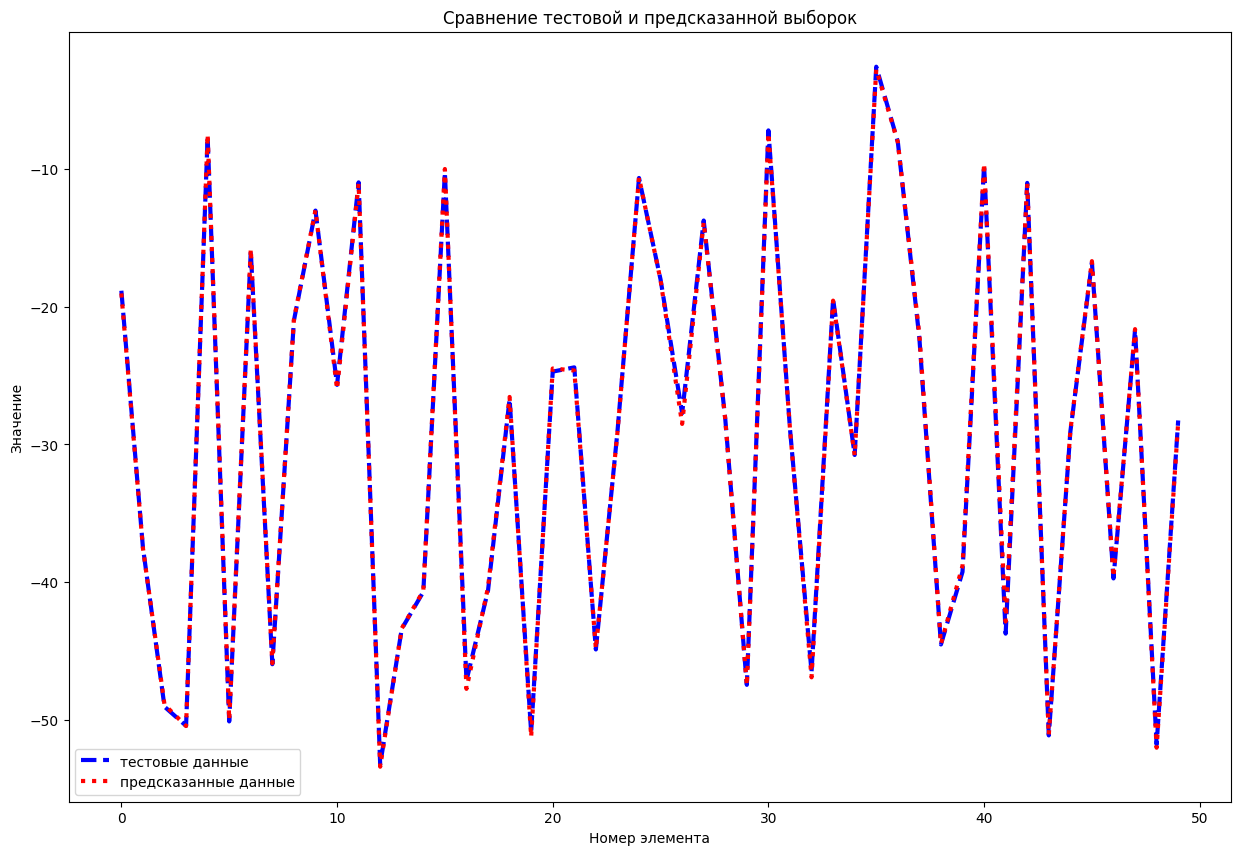

In [43]:
pred_test_graph(0, test_data[:50], pred_data[:50]);

C:\Users\79279\AppData\Local\Temp\ipykernel_1280\3557139280.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  pred_test_graph(50, test_data[50:100], pred_data[50:100]);


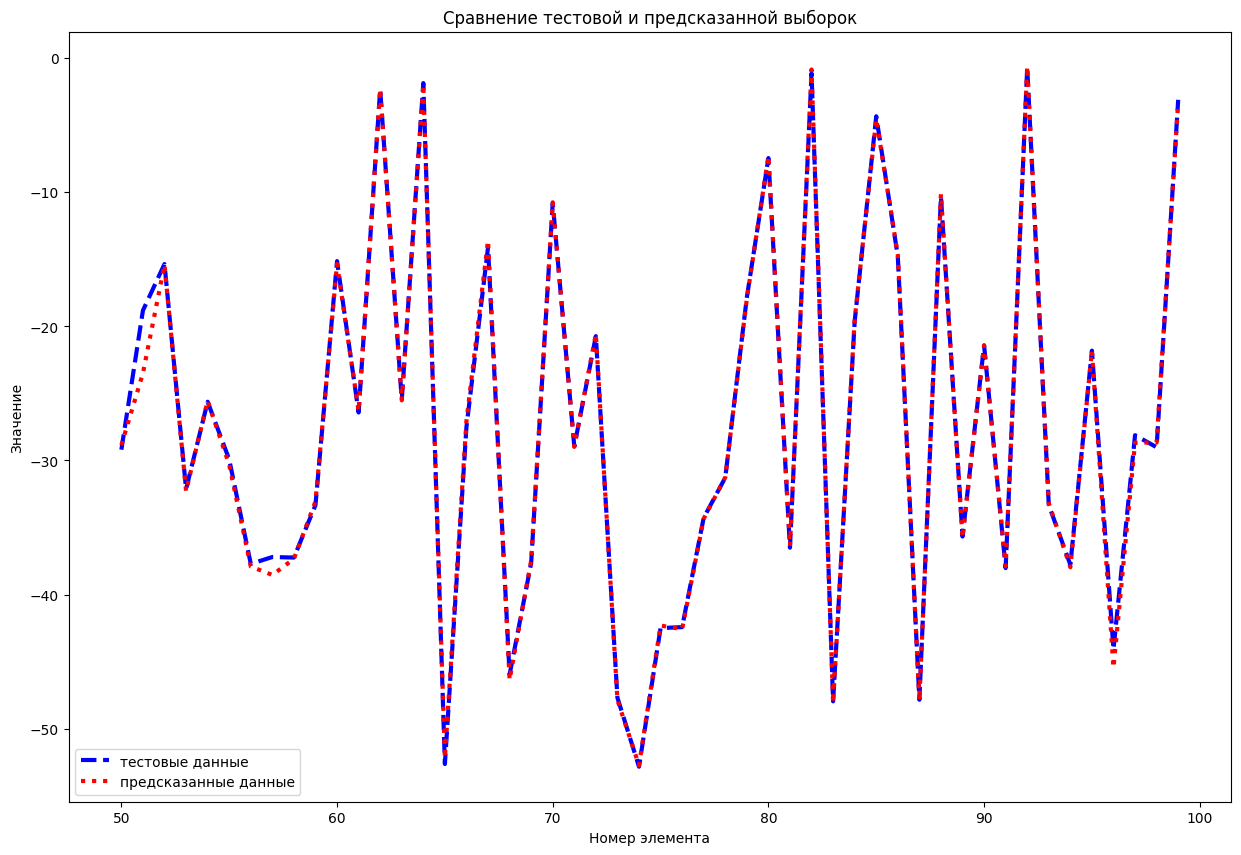

In [44]:
pred_test_graph(50, test_data[50:100], pred_data[50:100]);

C:\Users\79279\AppData\Local\Temp\ipykernel_1280\2804908016.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  pred_test_graph(100, test_data[100:150], pred_data[100:150]);


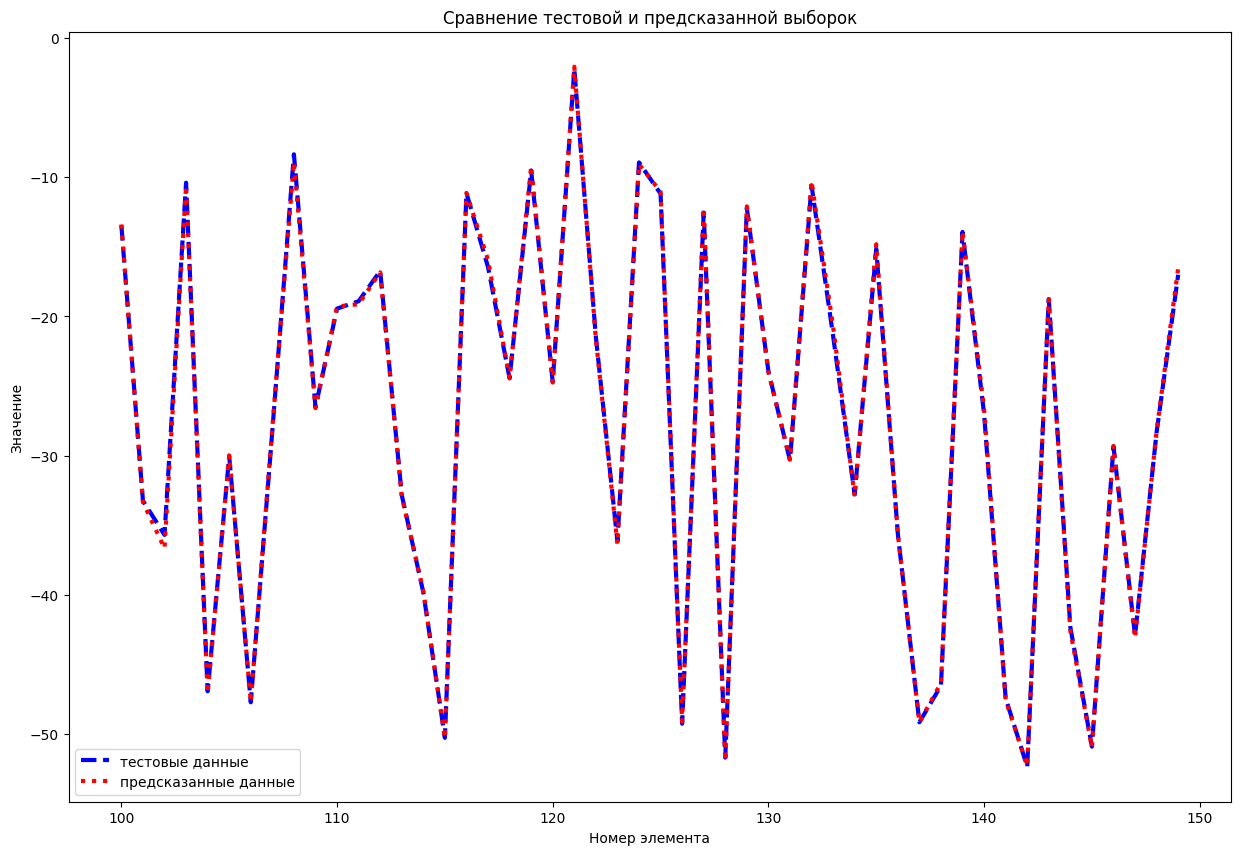

In [45]:
pred_test_graph(100, test_data[100:150], pred_data[100:150]);

In [47]:
pred_data = pd.Series([x[1] for x in y_pred])
pred_data

0         54.519424
1         51.757027
2         20.428949
3         16.376657
4         71.592285
            ...    
151295    65.812531
151296    34.645451
151297    65.209930
151298    74.207619
151299    33.728207
Length: 151300, dtype: float32

In [48]:
test_data = y_test['17 temperature, C']
test_data

199951    54.072778
431822    50.529708
726524    19.614878
208099    16.309362
632905    70.716698
            ...    
572944    65.126303
359478    34.651225
275793    64.088653
464905    73.039127
454556    33.165837
Name: 17 temperature, C, Length: 151300, dtype: float64

C:\Users\79279\AppData\Local\Temp\ipykernel_1280\3053642808.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  pred_test_graph(0, test_data[:50], pred_data[:50]);


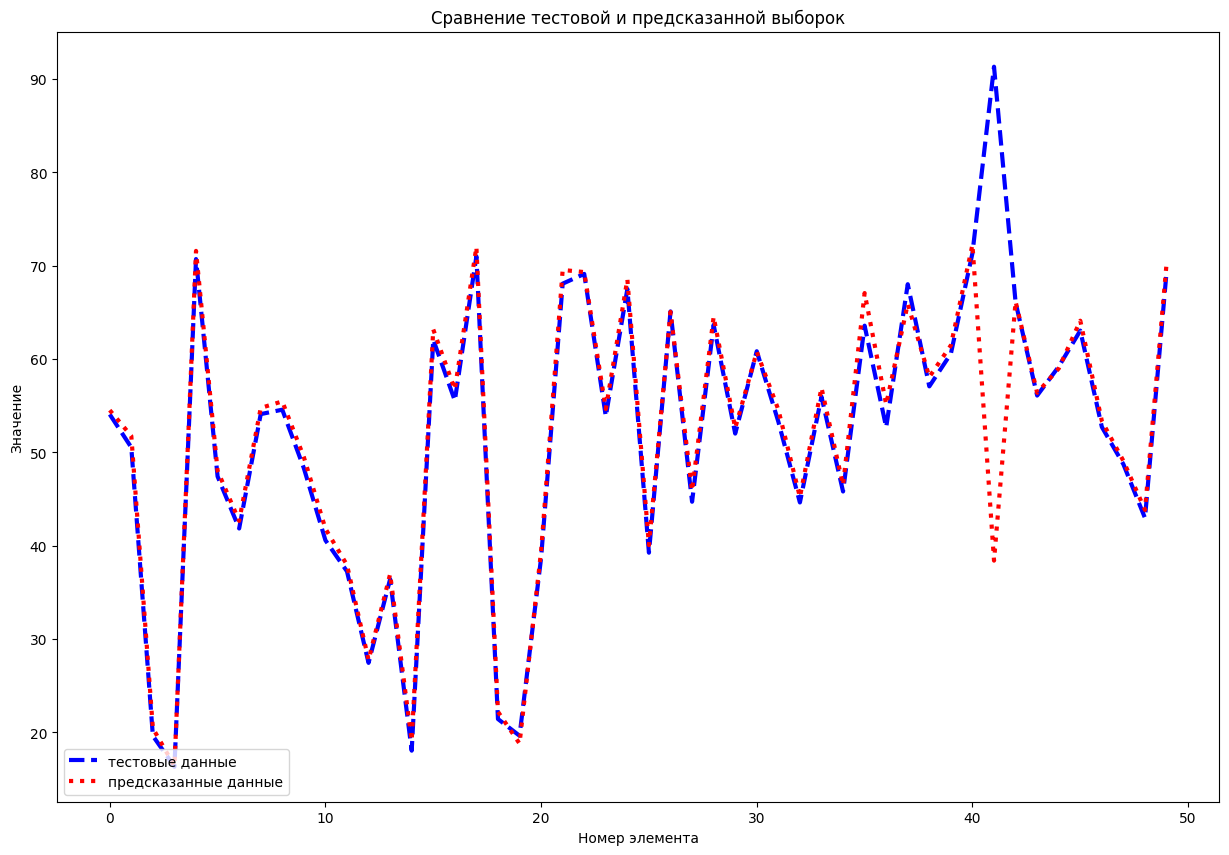

In [49]:
pred_test_graph(0, test_data[:50], pred_data[:50]);

C:\Users\79279\AppData\Local\Temp\ipykernel_1280\3557139280.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  pred_test_graph(50, test_data[50:100], pred_data[50:100]);


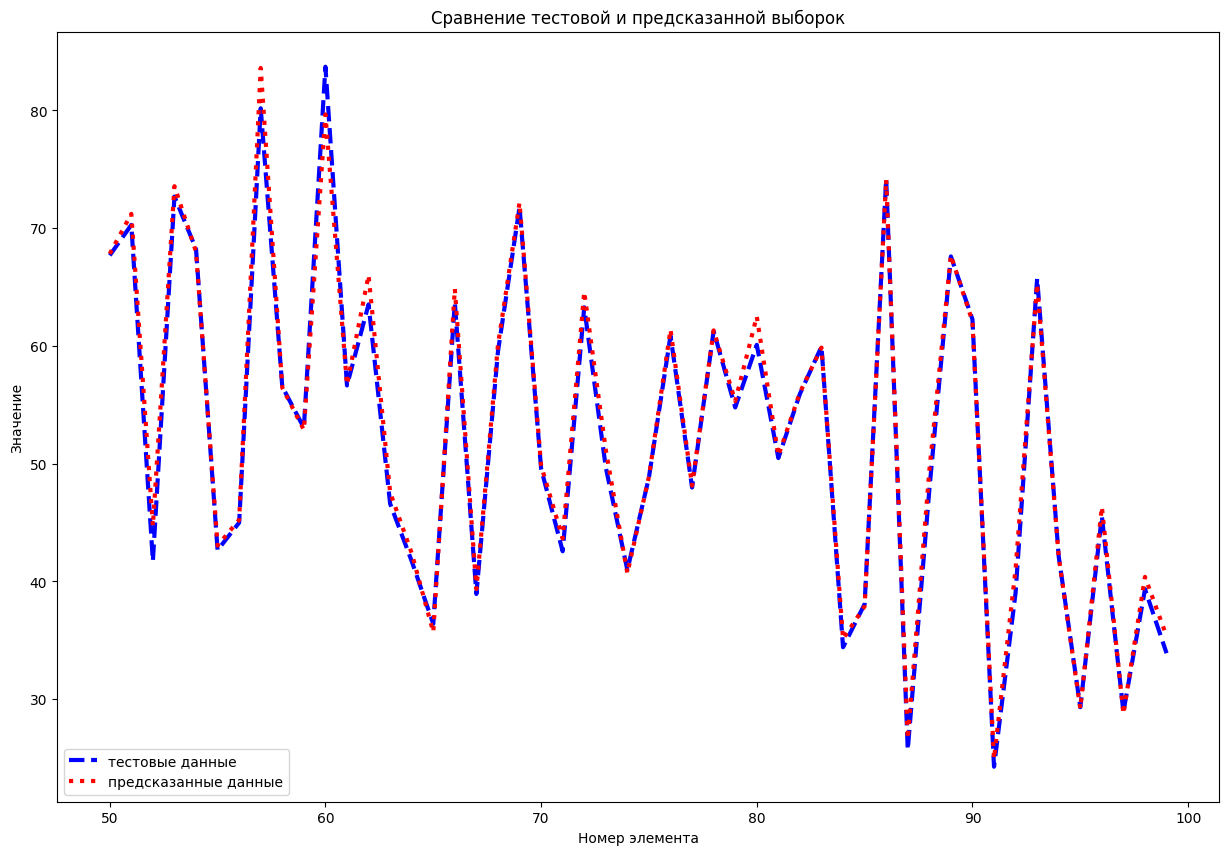

In [50]:
pred_test_graph(50, test_data[50:100], pred_data[50:100]);

C:\Users\79279\AppData\Local\Temp\ipykernel_1280\2804908016.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  pred_test_graph(100, test_data[100:150], pred_data[100:150]);


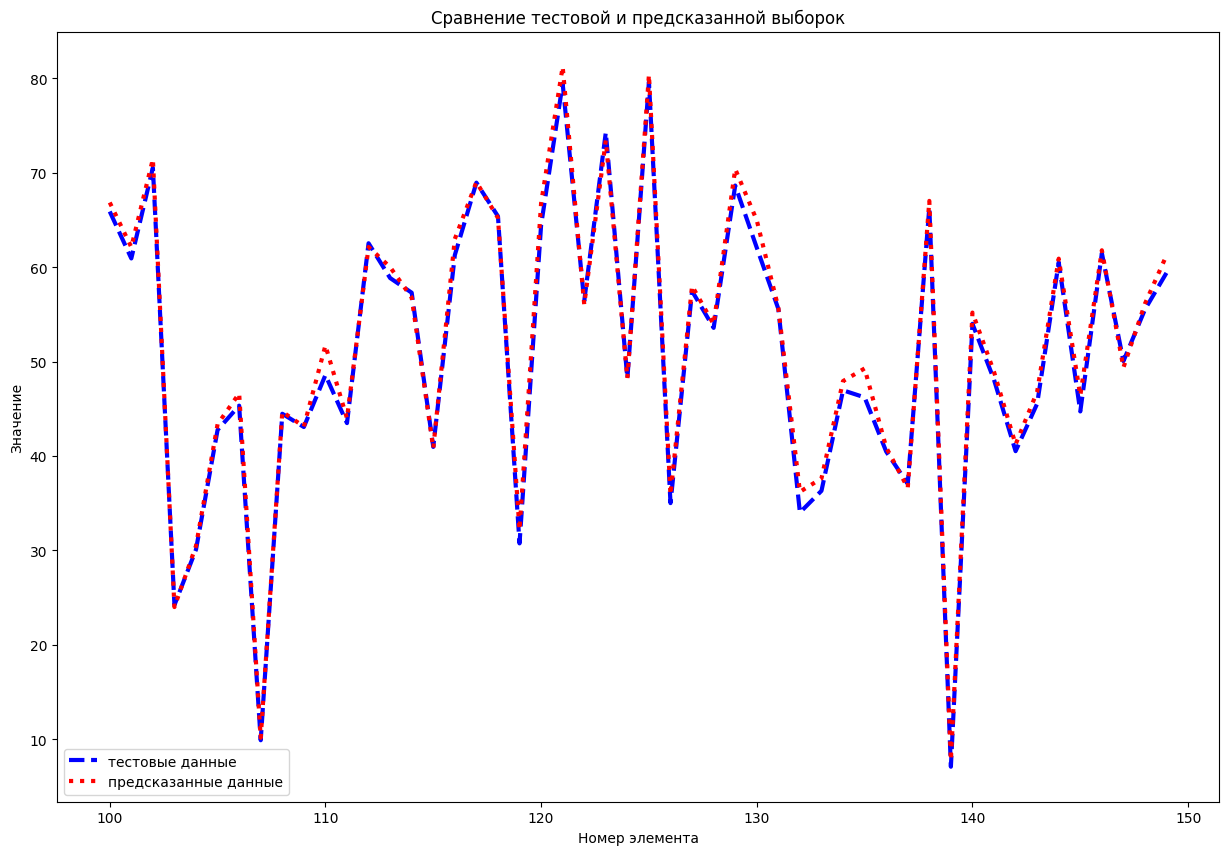

In [51]:
pred_test_graph(100, test_data[100:150], pred_data[100:150]);

C:\Users\79279\AppData\Local\Temp\ipykernel_1280\1623892939.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  pred_test_graph(150, test_data[150:200], pred_data[150:200]);


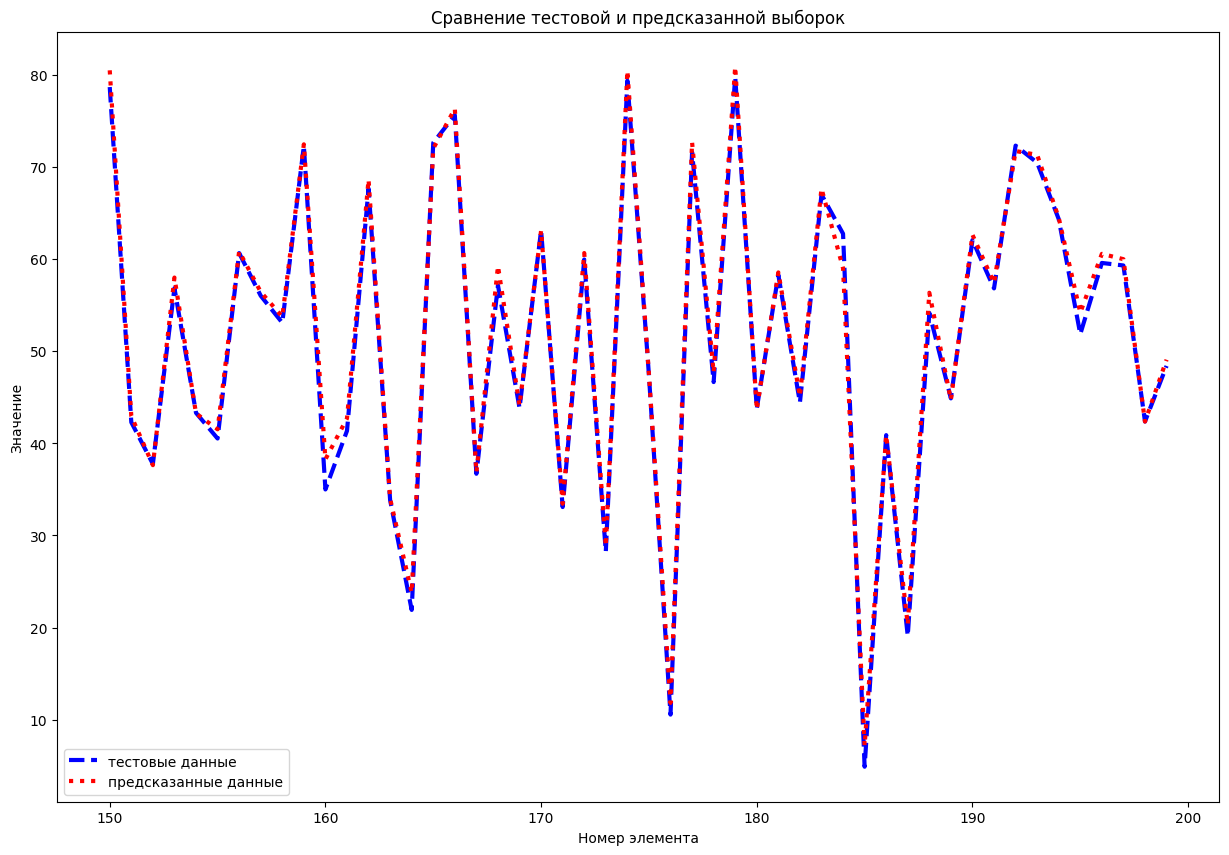

In [53]:
pred_test_graph(150, test_data[150:200], pred_data[150:200]);

C:\Users\79279\AppData\Local\Temp\ipykernel_1280\2292359059.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  pred_test_graph(200, test_data[200:250], pred_data[200:250]);


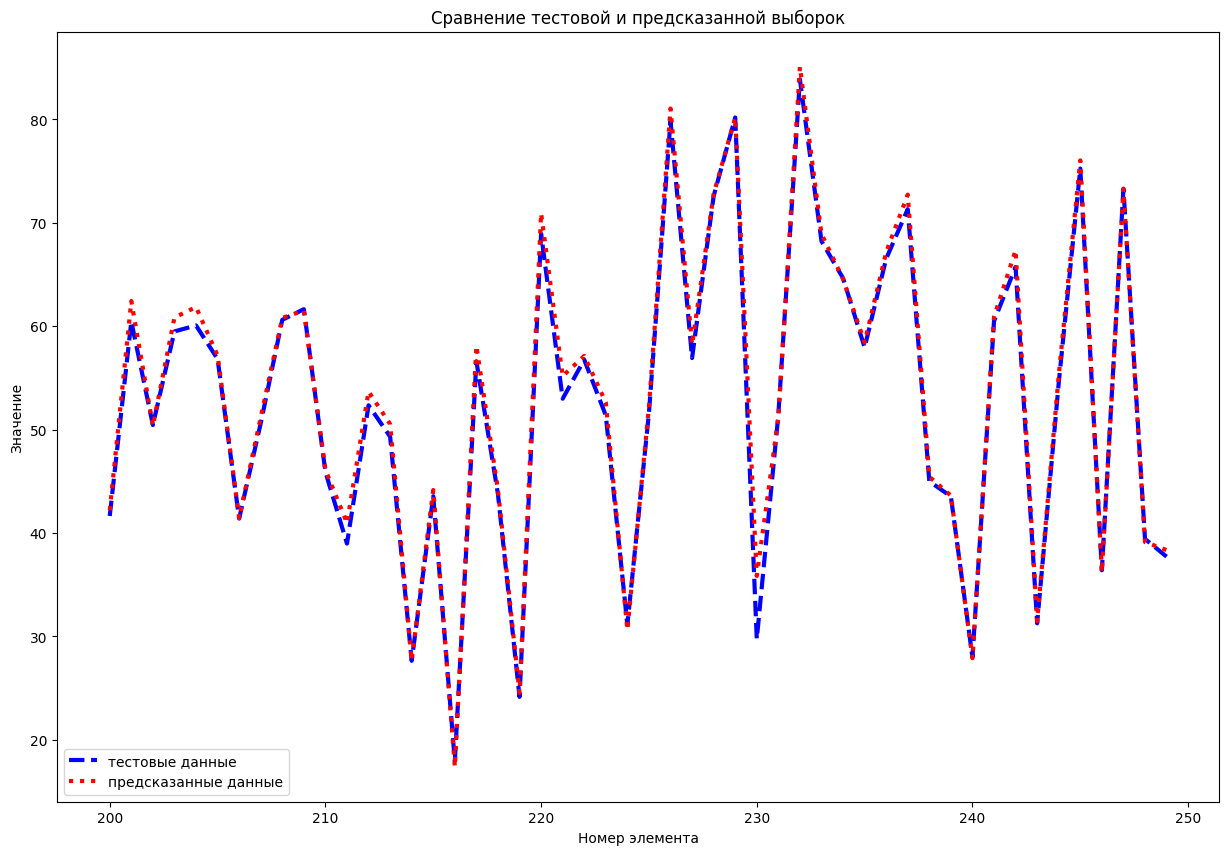

In [54]:
pred_test_graph(200, test_data[200:250], pred_data[200:250]);

In [56]:
prod_temp_model.save('./models/low_temp_dist/low_temp_prod_temp_model.h5')

# Массовые расходы продуктов

In [3]:
list(column_data.columns)

['4 temperature, C',
 '4 pressure, kPa',
 '4 mass flow, kg/h',
 '4 molecular weight',
 '4 Mass density, kg/m3',
 '4 actual liquid flow, m3/h',
 '4 actual vapour flow, m3/h',
 '4 mass heat capacity',
 '4 Methane mass frac',
 '4 Ethane mass frac',
 '4 Propane mass frac',
 '4 i-Butane mass frac',
 '4 n-Butane mass frac',
 '4 i-Pentane mass frac',
 '4 n-Pentane mass frac',
 'Q-104',
 '5 temperature, C',
 '5 pressure, kPa',
 '5 mass flow, kg/h',
 '5 molecular weight',
 '5 Mass density, kg/m3',
 '5 actual liquid flow, m3/h',
 '5 actual vapour flow, m3/h',
 '5 mass heat capacity',
 '5 Methane mass frac',
 '5 Ethane mass frac',
 '5 Propane mass frac',
 '5 i-Butane mass frac',
 '5 n-Butane mass frac',
 '5 i-Pentane mass frac',
 '5 n-Pentane mass frac',
 '16 temperature, C',
 '16 pressure, kPa',
 '16 mass flow, kg/h',
 '16 molecular weight',
 '16 Mass density, kg/m3',
 '16 actual liquid flow, m3/h',
 '16 actual vapour flow, m3/h',
 '16 mass heat capacity',
 '16 Methane mass frac',
 '16 Ethane ma

In [4]:
prod_mass_rate = column_data[[
    '4 temperature, C', '4 pressure, kPa', '4 mass flow, kg/h',  '4 Methane mass frac', '4 Ethane mass frac',
    '4 Propane mass frac', '4 i-Butane mass frac', '4 n-Butane mass frac', '4 i-Pentane mass frac', '4 n-Pentane mass frac',
    'Q-104', 
    '5 temperature, C', '5 pressure, kPa', '5 mass flow, kg/h', '5 Methane mass frac', '5 Ethane mass frac',
    '5 Propane mass frac', '5 i-Butane mass frac', '5 n-Butane mass frac', '5 i-Pentane mass frac', '5 n-Pentane mass frac',
    '16 temperature, C', '17 temperature, C', '16 mass flow, kg/h', '17 mass flow, kg/h'
]]

In [5]:
## Корреляционная матрица
corr_matrix = prod_mass_rate.corr()

corr_matrix['16 mass flow, kg/h'].sort_values(ascending=False)

16 mass flow, kg/h       1.000000
4 mass flow, kg/h        0.947941
17 mass flow, kg/h       0.239420
Q-104                    0.214631
5 mass flow, kg/h        0.178659
16 temperature, C        0.163780
5 Methane mass frac      0.146694
4 temperature, C         0.134089
4 Methane mass frac      0.075155
5 Ethane mass frac       0.044087
5 i-Pentane mass frac    0.040278
5 temperature, C         0.034925
5 n-Pentane mass frac    0.033467
5 Propane mass frac      0.025636
17 temperature, C        0.008971
5 pressure, kPa         -0.005211
4 Ethane mass frac      -0.010063
4 i-Pentane mass frac   -0.013233
4 pressure, kPa         -0.015007
4 n-Pentane mass frac   -0.017362
4 n-Butane mass frac    -0.017875
4 Propane mass frac     -0.045120
5 n-Butane mass frac    -0.046772
5 i-Butane mass frac    -0.047158
4 i-Butane mass frac    -0.054555
Name: 16 mass flow, kg/h, dtype: float64

In [6]:
prod_mass_rate.describe()

,"4 temperature, C","4 pressure, kPa","4 mass flow, kg/h",4 Methane mass frac,4 Ethane mass frac,4 Propane mass frac,4 i-Butane mass frac,4 n-Butane mass frac,4 i-Pentane mass frac,4 n-Pentane mass frac,...,5 Ethane mass frac,5 Propane mass frac,5 i-Butane mass frac,5 n-Butane mass frac,5 i-Pentane mass frac,5 n-Pentane mass frac,"16 temperature, C","17 temperature, C","16 mass flow, kg/h","17 mass flow, kg/h"
count,756500.000000,756500.000000,756500.000000,756500.000000,756500.000000,756500.000000,756500.000000,756500.000000,756500.000000,756500.000000,...,756500.000000,756500.000000,756500.000000,756500.000000,756500.000000,756500.000000,756500.000000,756500.000000,756500.000000,756500.000000
mean,-23.854432,2403.336691,13365.439516,0.659098,0.089297,0.102738,0.097958,0.021537,0.014647,0.014725,...,0.075000,0.108634,0.303250,0.292720,0.040031,0.052490,-27.557931,50.526503,13491.012346,12827.090881
std,15.536276,231.235044,6832.299114,0.058440,0.039000,0.040603,0.033019,0.010412,0.005888,0.005884,...,0.042639,0.059693,0.140350,0.144137,0.024943,0.032885,14.369124,16.806884,6230.680771,6190.739551
min,-50.000000,2000.000000,1000.000000,0.474671,0.016601,0.024350,0.031719,0.003071,0.003722,0.003633,...,0.006340,0.009732,0.017781,0.002024,0.001525,0.001550,-81.016127,-46.503500,714.267133,0.000398
25%,-37.000000,2204.000000,7571.000000,0.618637,0.056642,0.068939,0.071000,0.012794,0.009733,0.009810,...,0.041603,0.061873,0.194847,0.182165,0.020396,0.026393,-39.436051,40.961865,8382.902277,7683.277028
50%,-24.000000,2405.000000,13508.000000,0.659794,0.089364,0.103079,0.097895,0.021295,0.014495,0.014598,...,0.070771,0.103566,0.313189,0.305453,0.037527,0.049586,-27.361766,52.803104,13488.806256,12724.935612
75%,-11.000000,2604.000000,19265.000000,0.699705,0.120279,0.134735,0.122728,0.029737,0.019137,0.019225,...,0.100511,0.145161,0.406060,0.399827,0.055164,0.072725,-15.761939,62.433614,18433.880670,17816.253083
max,5.000000,2800.000000,25000.000000,0.868820,0.207423,0.226293,0.207015,0.055214,0.034837,0.035211,...,0.374282,0.478235,0.788800,0.756774,0.232880,0.292297,66.249248,164.099060,43446.970233,32557.570680


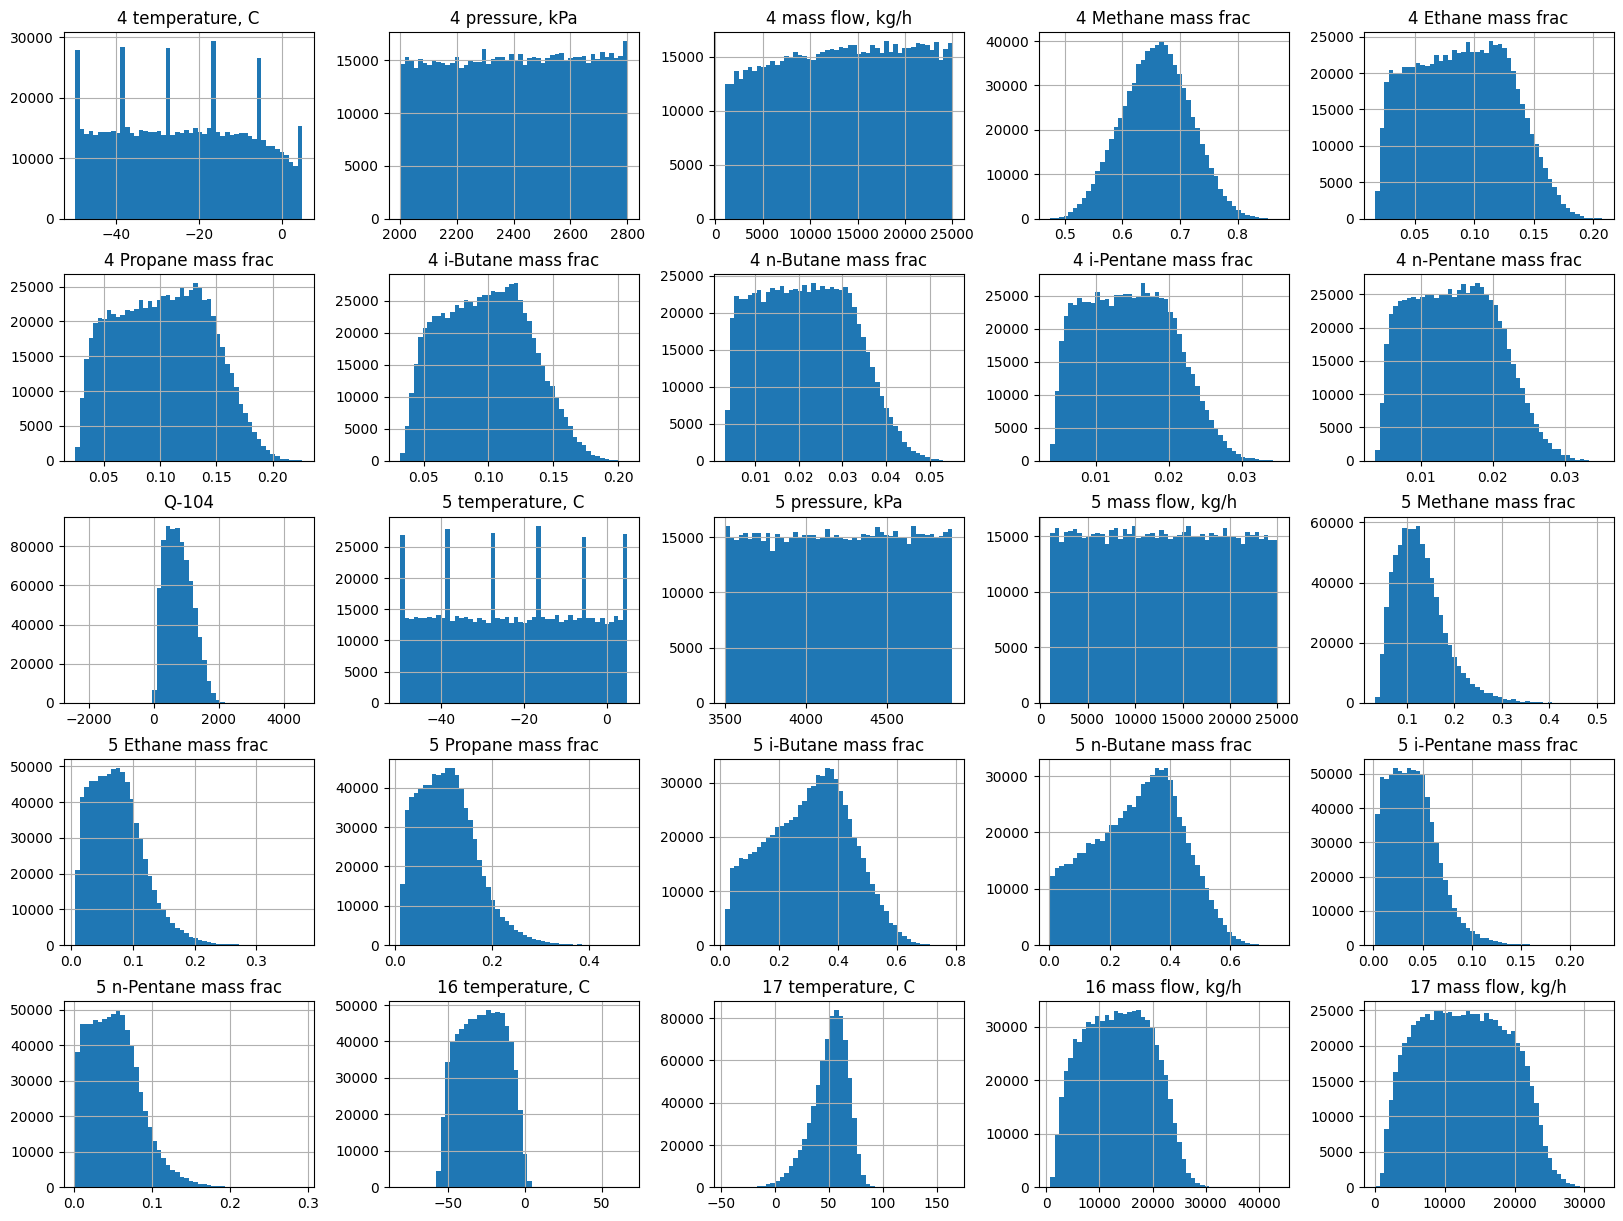

In [7]:
prod_mass_rate.hist(bins=50, figsize=(20, 15));

In [33]:
## Тестовая и обучающая выборки
X = prod_mass_rate[[
    '4 temperature, C', '4 pressure, kPa', '4 mass flow, kg/h',  '4 Methane mass frac', '4 Ethane mass frac',
    '4 Propane mass frac', '4 i-Butane mass frac', '4 n-Butane mass frac', '4 i-Pentane mass frac', '4 n-Pentane mass frac',
    'Q-104', 
    '5 temperature, C', '5 pressure, kPa', '5 mass flow, kg/h', '5 Methane mass frac', '5 Ethane mass frac',
    '5 Propane mass frac', '5 i-Butane mass frac', '5 n-Butane mass frac', '5 i-Pentane mass frac', '5 n-Pentane mass frac',
    '16 temperature, C', '17 temperature, C'
]]

y = prod_mass_rate[['16 mass flow, kg/h']]

# Собираем трансформер столбцов
ct = make_column_transformer(
    (MinMaxScaler(), ['4 temperature, C', '4 pressure, kPa', '4 mass flow, kg/h','4 Methane mass frac',
                      '4 Ethane mass frac', '4 Propane mass frac', '4 i-Butane mass frac', '4 n-Butane mass frac',
                      '4 i-Pentane mass frac', '4 n-Pentane mass frac', 'Q-104', '5 temperature, C', '5 pressure, kPa',
                      '5 mass flow, kg/h', '5 Methane mass frac', '5 Ethane mass frac', '5 Propane mass frac',
                      '5 i-Butane mass frac', '5 n-Butane mass frac', '5 i-Pentane mass frac', '5 n-Pentane mass frac',
                      '16 temperature, C', '17 temperature, C'
                     ])
)

# Создаем обучающую и тестовые выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Загружаем тренировочную выборку
ct.fit(X_train)

# Нормализуем данные
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

X_train_normal.shape, y_train.shape

((605200, 23), (605200, 1))

In [35]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
prod_mass_flow = tf.keras.Sequential([
    tf.keras.layers.Dense(23, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
prod_mass_flow.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae']
)

# 3. Fit the model
prod_mass_flow.fit(X_train_normal, y_train, epochs=20)

Epoch 1/20
18913/18913 [==============================] - 44s 2ms/step - loss: 379.3582 - mae: 379.3582
Epoch 2/20
18913/18913 [==============================] - 44s 2ms/step - loss: 112.3189 - mae: 112.3189
Epoch 3/20
18913/18913 [==============================] - 45s 2ms/step - loss: 100.9822 - mae: 100.9822
Epoch 4/20
18913/18913 [==============================] - 43s 2ms/step - loss: 95.3257 - mae: 95.3257
Epoch 5/20
18913/18913 [==============================] - 41s 2ms/step - loss: 89.2965 - mae: 89.2965
Epoch 6/20
18913/18913 [==============================] - 43s 2ms/step - loss: 85.0924 - mae: 85.0924
Epoch 7/20
18913/18913 [==============================] - 43s 2ms/step - loss: 80.3092 - mae: 80.3092
Epoch 8/20
18913/18913 [==============================] - 44s 2ms/step - loss: 75.6512 - mae: 75.6512
Epoch 9/20
18913/18913 [==============================] - 45s 2ms/step - loss: 71.9799 - mae: 71.9799
Epoch 10/20
18913/18913 [==============================] - 45s 2ms/step - lo

In [36]:
y_pred = prod_mass_flow.predict(X_test_normal)
y_pred

4729/4729 [==============================] - 8s 2ms/step


array([[ 9147.319 ],
       [17575.092 ],
       [13674.171 ],
       ...,
       [ 3551.7795],
       [10421.865 ],
       [20968.58  ]], dtype=float32)

In [39]:
x = 1
pred = y_pred[x]
pred

array([17575.092], dtype=float32)

In [40]:
test = y_test.iloc[x]
test

16 mass flow, kg/h    17623.559781
Name: 431822, dtype: float64

In [41]:
pred_data = y_pred

In [44]:
test_data = y_test['16 mass flow, kg/h']
test_data

199951     9369.926467
431822    17623.559781
726524    13750.021898
208099     6255.768588
632905    20209.736552
              ...     
572944    17853.322441
359478    15631.444951
275793     3615.567954
464905    10536.812003
454556    21041.571961
Name: 16 mass flow, kg/h, Length: 151300, dtype: float64

C:\Users\79279\AppData\Local\Temp\ipykernel_6072\3053642808.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  pred_test_graph(0, test_data[:50], pred_data[:50]);


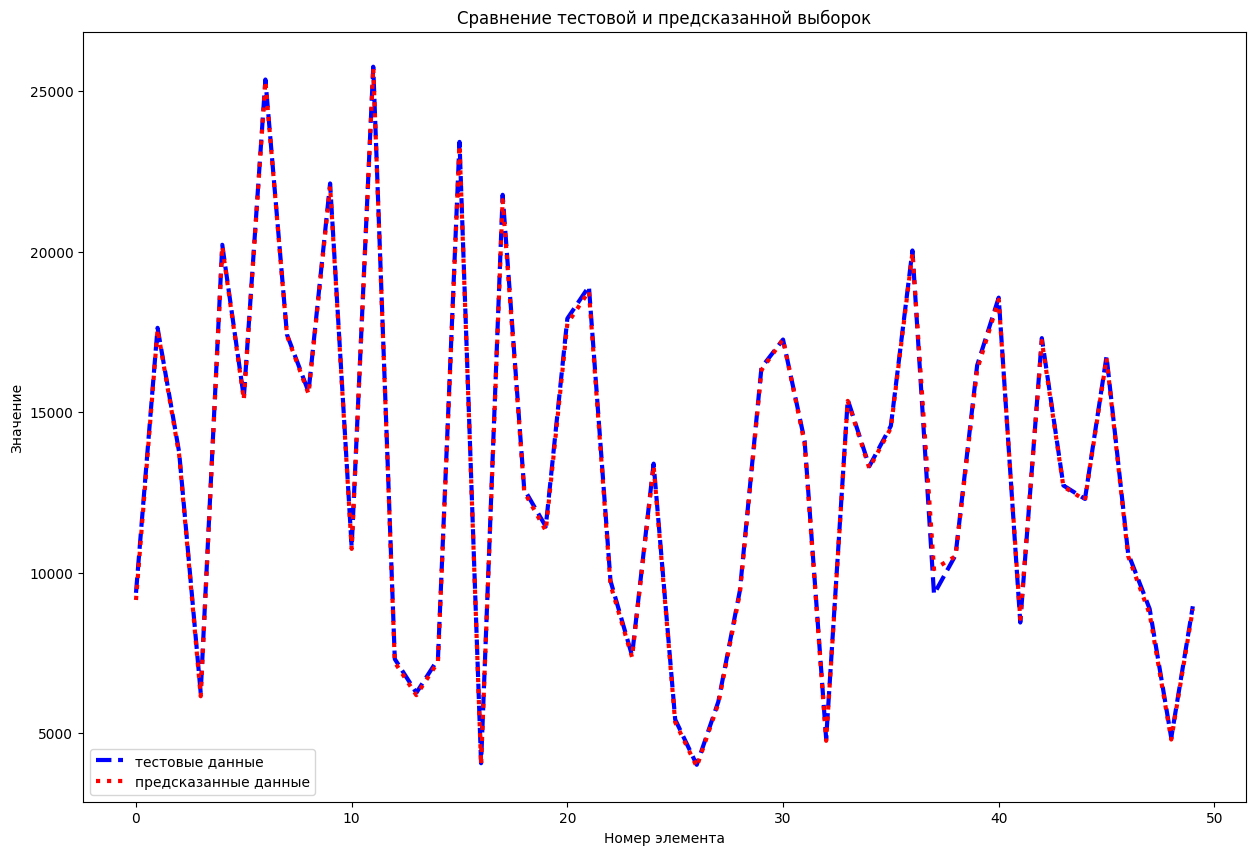

In [45]:
pred_test_graph(0, test_data[:50], pred_data[:50]);

C:\Users\79279\AppData\Local\Temp\ipykernel_6072\3557139280.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  pred_test_graph(50, test_data[50:100], pred_data[50:100]);


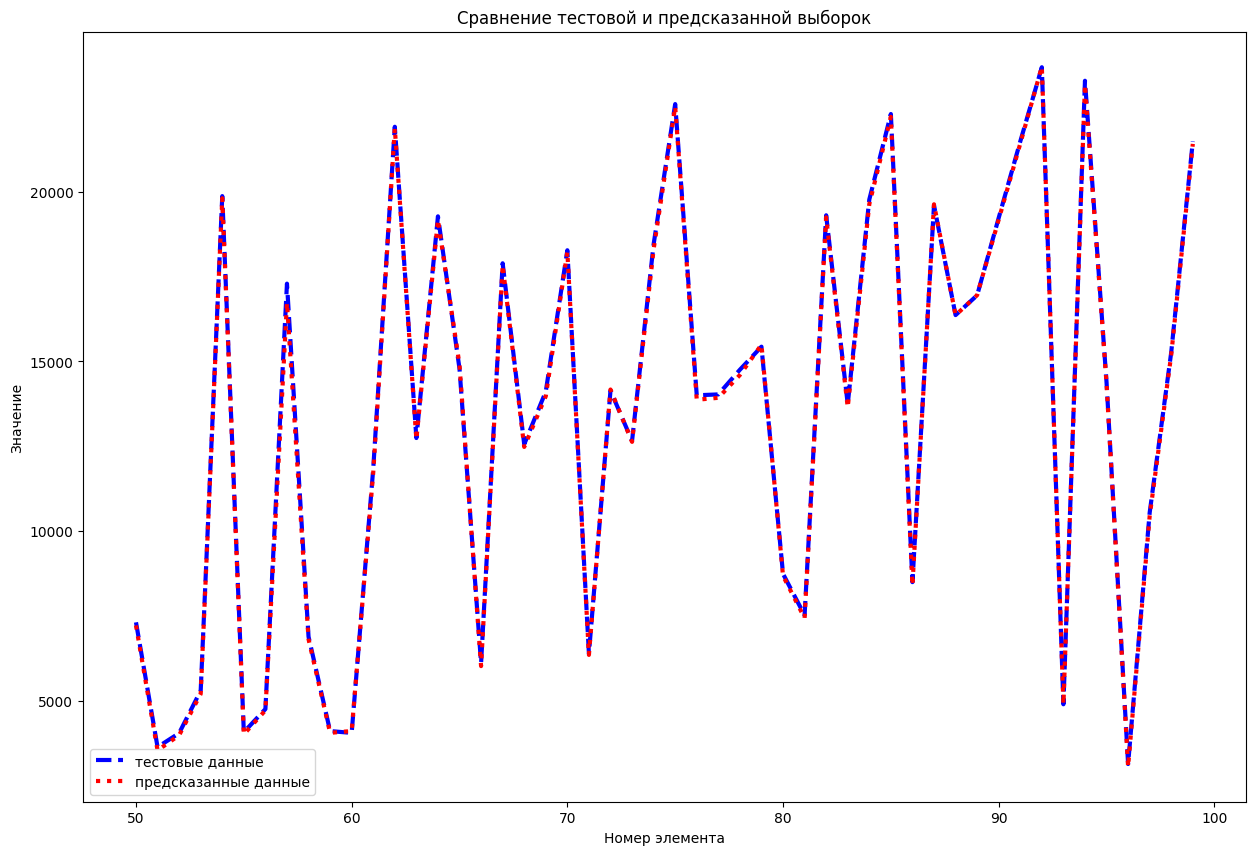

In [46]:
pred_test_graph(50, test_data[50:100], pred_data[50:100]);

C:\Users\79279\AppData\Local\Temp\ipykernel_6072\2804908016.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  pred_test_graph(100, test_data[100:150], pred_data[100:150]);


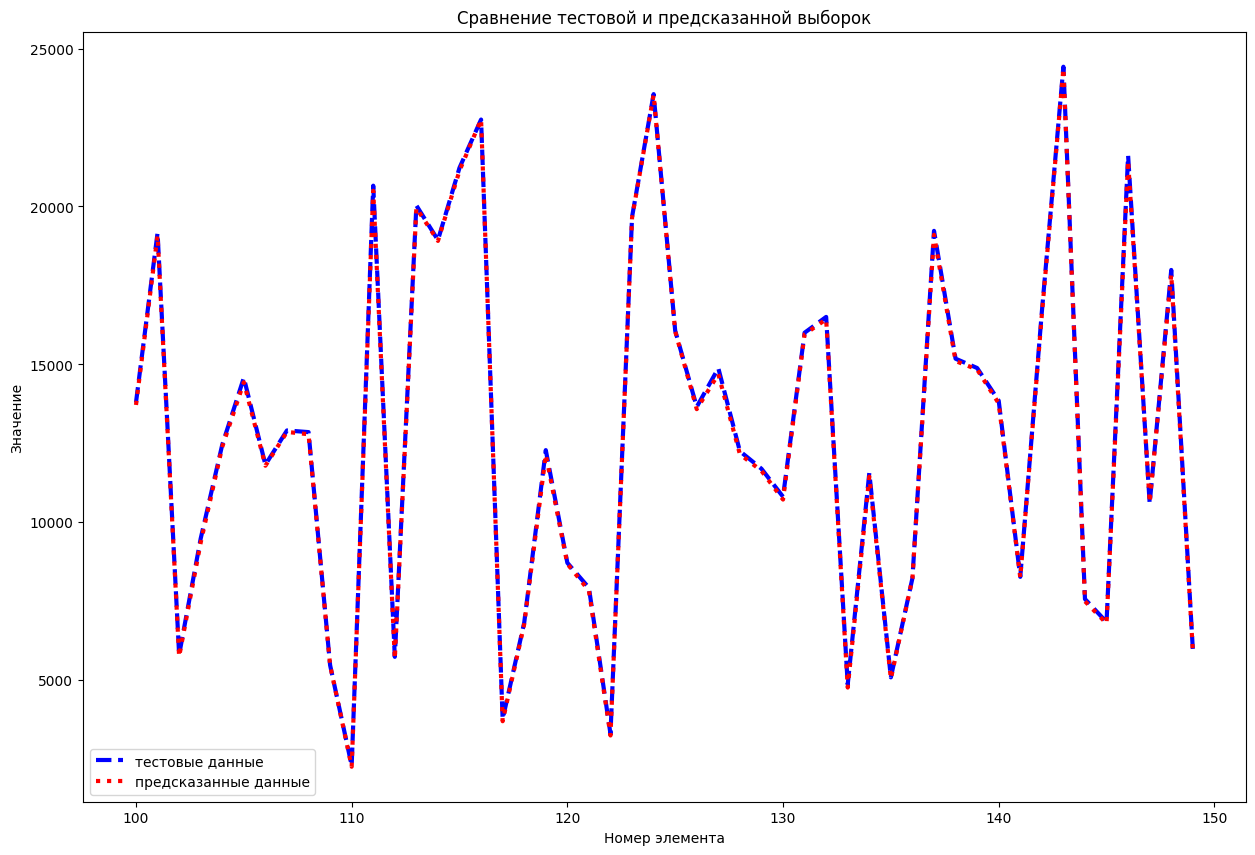

In [48]:
pred_test_graph(100, test_data[100:150], pred_data[100:150]);

C:\Users\79279\AppData\Local\Temp\ipykernel_6072\1623892939.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  pred_test_graph(150, test_data[150:200], pred_data[150:200]);


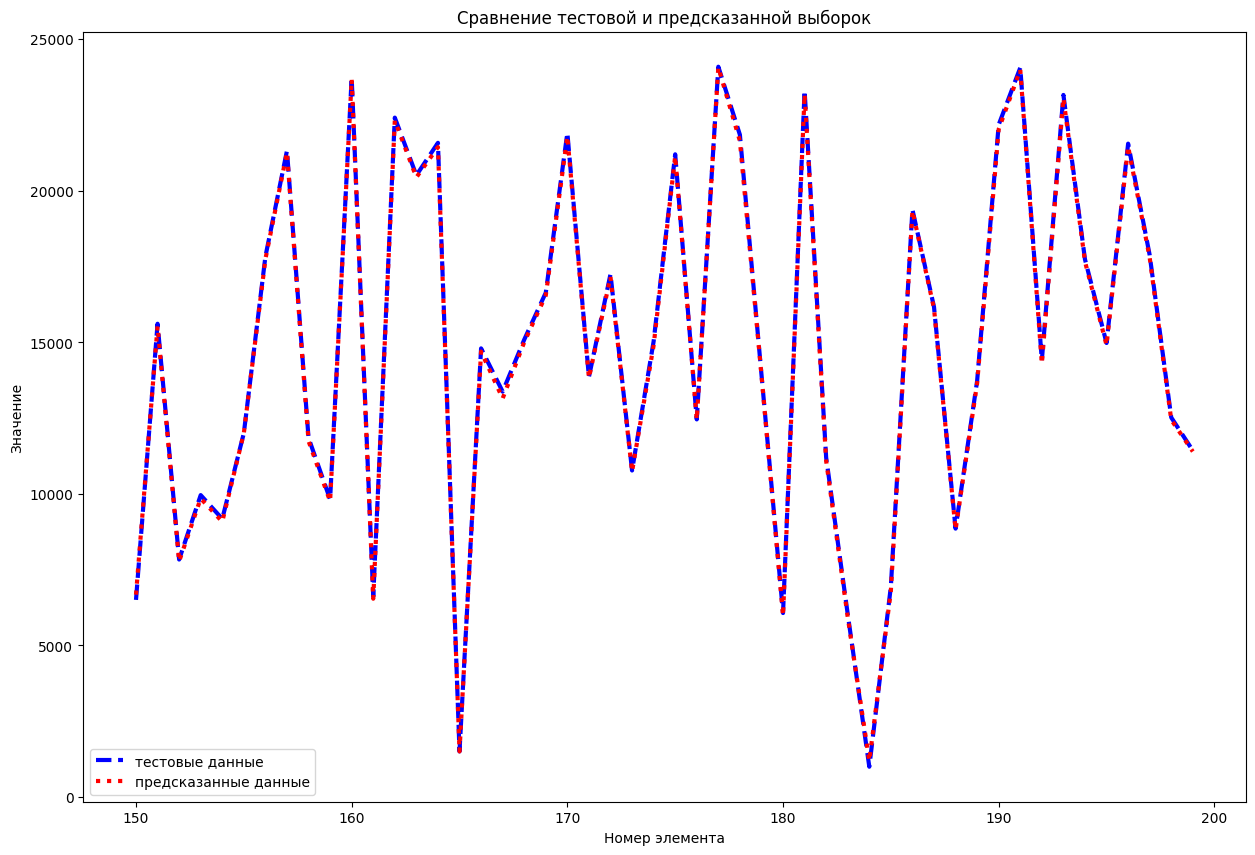

In [49]:
pred_test_graph(150, test_data[150:200], pred_data[150:200]);

In [50]:
prod_mass_flow.save('./models/low_temp_dist/low_temp_prod_mass_flow_model.h5')